In [2]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
sns.set()

The sns.set() command is used in conjunction with the Seaborn library in Python. Seaborn is a data visualization library built on top of Matplotlib that provides a high-level interface for creating attractive and informative statistical graphics.
When you call sns.set(), it sets the default Seaborn theme, which applies a specific style to your plots. This default style is optimized for visualizing statistical information and is designed to be visually appealing.
By calling sns.set(), you enable the default Seaborn settings for your plots, including the color palette, grid lines, font styles, and more. You can then start creating your visualizations using Seaborn's functions and the chosen default style.
It's worth mentioning that sns.set() is typically called at the beginning of your script or notebook to ensure consistent styling across all subsequent plots. You can also pass additional parameters to sns.set() to modify specific style elements or use different Seaborn themes.
If you have any further questions or need assistance with Seaborn or any other topic, feel free to ask!








# Read in the datasets

In [4]:
# Train Datasets
train_demo = pd.read_csv('traindemographics.csv')
train_prevloan = pd.read_csv('trainprevloans.csv')
train_perf = pd.read_csv('trainperf.csv')

In [5]:
# Test Datasets
test_demo = pd.read_csv('testdemographics.csv')
test_prevloan = pd.read_csv('testprevloans.csv')
test_perf = pd.read_csv('testperf.csv')

In [6]:
print(train_demo.info())
train_demo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB
None


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


Demographic information

- Get age from birth date
- Categories for Bank account type
- Categories for employment status
- Categories for education level

In [7]:
train_demo.birthdate.isna().sum()

0

In [8]:
print(train_demo.level_of_education_clients.value_counts())
print(train_demo.level_of_education_clients.isna().sum())

Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: level_of_education_clients, dtype: int64
3759


In [9]:
print(train_demo.employment_status_clients.value_counts())
print(train_demo.employment_status_clients.isna().sum())


Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64
648


In [10]:
train_demo['employment_status_clients'].replace(np.nan, "Unknown", inplace = True)
test_demo['employment_status_clients'].replace(np.nan, "Unknown", inplace = True)


In [11]:
print(train_demo.employment_status_clients.value_counts())
print(train_demo.employment_status_clients.isna().sum())

Permanent        3146
Unknown           648
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64
0


In [12]:
print(train_demo['employment_status_clients'].value_counts())

Permanent        3146
Unknown           648
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64


In [13]:
print(train_demo.bank_account_type.value_counts())
print(train_demo.bank_account_type.isna().sum())

Savings    3425
Other       865
Current      56
Name: bank_account_type, dtype: int64
0


In [14]:
def demo_features(train_demo):
    train_demo_cols = train_demo[['customerid']].copy(deep = True)
    train_demo_cols['age'] =  date.today().year - pd.DatetimeIndex(train_demo['birthdate']).year
    train_demo_cols = pd.concat([train_demo_cols, pd.get_dummies(train_demo['bank_account_type'], 'bank_account_type')], axis=1)
    train_demo_cols = pd.concat([train_demo_cols, pd.get_dummies(train_demo['employment_status_clients'], 'employment_status_clients')], axis=1)

    return train_demo_cols

train_demo_cols = demo_features(train_demo)
train_demo_cols.head().T

,0,1,2,3,4
customerid,8a858e135cb22031015cbafc76964ebd,8a858e275c7ea5ec015c82482d7c3996,8a858e5b5bd99460015bdc95cd485634,8a858efd5ca70688015cabd1f1e94b55,8a858e785acd3412015acd48f4920d04
age,50,37,36,32,41
bank_account_type_Current,0,0,0,0,0
bank_account_type_Other,0,0,0,0,0
bank_account_type_Savings,1,1,1,1,1
employment_status_clients_Contract,0,0,0,0,0
employment_status_clients_Permanent,0,1,0,1,1
employment_status_clients_Retired,0,0,0,0,0
employment_status_clients_Self-Employed,0,0,0,0,0
employment_status_clients_Student,0,0,0,0,0


The code you provided defines a function called demo_features that takes a DataFrame train_demo as input and performs some feature engineering tasks. The function returns a new DataFrame train_demo_cols with the transformed features.

Here's a breakdown of what the code does:

It creates a new DataFrame train_demo_cols by selecting the 'customerid' column from the train_demo DataFrame using double square brackets [['customerid']]. The copy(deep=True) method is used to create a deep copy of the selected column.

It calculates the 'age' feature by subtracting the birth year from the current year. It uses the pd.DatetimeIndex function to extract the year from the 'birthdate' column of the train_demo DataFrame. The calculation is performed using date.today().year - pd.DatetimeIndex(train_demo['birthdate']).year.

It uses the pd.get_dummies() function to create one-hot encoded dummy variables for the 'bank_account_type' and 'employment_status_clients' columns of the train_demo DataFrame. The resulting dummy variables are concatenated with the train_demo_cols DataFrame using pd.concat().

Finally, the function returns the train_demo_cols DataFrame.

After defining the function, the code calls the demo_features function passing the train_demo DataFrame as an argument. The returned DataFrame is assigned to the variable train_demo_cols.

In [15]:
print(train_prevloan.info())
train_prevloan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB
None


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [16]:
train_prevloan.isin([np.nan]).sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

Previous loan behviour

- Mean loan amount
- Number of loans taken


- Times first payment past first due date
- Times closed date after approveddate + termdays


- Days between last loan and this one
- Last loan on time
- Last loan value

In [17]:
def prevloan_features(train_prevloan):
    train_prevloan_cols = train_prevloan.copy(deep = True)

    train_prevloan_cols['firstrepaiddate'] = pd.to_datetime(train_prevloan_cols['firstrepaiddate']) 
    train_prevloan_cols['firstduedate'] = pd.to_datetime(train_prevloan_cols['firstduedate'])
    train_prevloan_cols['missed_first_due_date'] = train_prevloan_cols['firstrepaiddate'].dt.date > train_prevloan_cols['firstduedate'].dt.date

    train_prevloan_cols['closeddate'] = pd.to_datetime(train_prevloan_cols['closeddate'])
    train_prevloan_cols['approveddate'] = pd.to_datetime(train_prevloan_cols['approveddate'])
    train_prevloan_cols['termdays_td'] = pd.to_timedelta(train_prevloan_cols['termdays'], unit= 'days')
    train_prevloan_cols['finalduedate'] = train_prevloan_cols['approveddate'] + train_prevloan_cols['termdays_td']
    train_prevloan_cols['closed_loan_late'] = train_prevloan_cols['closeddate'].dt.date > train_prevloan_cols['finalduedate'].dt.date

    train_prevloan_cols_grp = train_prevloan_cols[['customerid','loanamount', 'missed_first_due_date', 'closed_loan_late', 'termdays']]

    train_prevloan_cols_grp_cols = train_prevloan_cols_grp.groupby('customerid', as_index = False).agg({'loanamount':'mean', 'missed_first_due_date': 'sum', 'closed_loan_late':'sum', 'termdays':'mean'})
    train_prevloan_cols_grp_cols.rename( columns = {'loanamount': 'avg_loanamount', 'missed_first_due_date': 'total_missed_first_due_date', 'closed_loan_late':'total_closed_loan_late', 'termdays':'average_termdays'}   , inplace = True)

    return train_prevloan_cols_grp_cols

train_prevloan_cols_grp_cols = prevloan_features(train_prevloan)
train_prevloan_cols_grp_cols

,customerid,avg_loanamount,total_missed_first_due_date,total_closed_loan_late,average_termdays
0,8a1088a0484472eb01484669e3ce4e0b,10000.000000,1,1,15.000000
1,8a1a1e7e4f707f8b014f797718316cad,17500.000000,1,1,37.500000
2,8a1a32fc49b632520149c3b8fdf85139,12857.142857,1,1,19.285714
3,8a1eb5ba49a682300149c3c068b806c7,16250.000000,1,0,33.750000
4,8a1edbf14734127f0147356fdb1b1eb2,10000.000000,0,0,22.500000
...,...,...,...,...,...
4354,8a858fff5a28d297015a33bc2e845305,16666.666667,0,0,35.000000
4355,8a858fff5a36fe68015a37f8550a02a2,15000.000000,0,1,27.500000
4356,8a858fff5a36fe68015a3ac5851618ab,10000.000000,0,0,30.000000
4357,8a858fff5a36fe68015a3b8dcb8a3843,13333.333333,0,0,22.500000


The code you provided defines a function called prevloan_features that takes a DataFrame train_prevloan as input and performs some feature engineering tasks on it. The function returns a new DataFrame train_prevloan_cols_grp_cols with the transformed features.

Here's a breakdown of what the code does:

It creates a new DataFrame train_prevloan_cols by making a deep copy of the train_prevloan DataFrame using copy(deep=True).

It converts the 'firstrepaiddate' and 'firstduedate' columns of train_prevloan_cols to datetime format using the pd.to_datetime() function.

It creates a new boolean column 'missed_first_due_date' in train_prevloan_cols by comparing the dates in 'firstrepaiddate' and 'firstduedate' columns. If the first repayment date is greater than the first due date, it is considered as a missed first due date.

It converts the 'closeddate' and 'approveddate' columns of train_prevloan_cols to datetime format.

It converts the 'termdays' column of train_prevloan_cols to timedelta format using the pd.to_timedelta() function.

It calculates the 'finalduedate' by adding the 'approveddate' and 'termdays_td' columns together.

It creates a new boolean column 'closed_loan_late' in train_prevloan_cols by comparing the dates in 'closeddate' and 'finalduedate' columns. If the loan is closed after the final due date, it is considered as a closed loan late.

It selects the relevant columns from train_prevloan_cols and assigns them to the train_prevloan_cols_grp DataFrame.

It groups the train_prevloan_cols_grp DataFrame by 'customerid' using the groupby() method and calculates the mean of 'loanamount', the sum of 'missed_first_due_date', the sum of 'closed_loan_late', and the mean of 'termdays'. The result is stored in the train_prevloan_cols_grp_cols DataFrame.

It renames the columns in train_prevloan_cols_grp_cols using the rename() method.

Finally, the function returns the train_prevloan_cols_grp_cols DataFrame.

After defining the function, the code calls the prevloan_features function passing the train_prevloan DataFrame as an argument. The returned DataFrame is assigned to the variable train_prevloan_cols_grp_cols.

If you have any further questions or need more clarification, please let me know!








In [18]:
print(train_perf.info())
train_perf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB
None


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [19]:
train_perf.isin([np.nan]).sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [20]:
train_perf['good_bad_ind'] = np.where(train_perf['good_bad_flag']=="Good", 1, 0)
train_perf['good_bad_ind'].value_counts()

1    3416
0     952
Name: good_bad_ind, dtype: int64

Most people do not default on their loans

Perf columns:

- Total amount due 
- Loan number
- Term days

In [21]:
def perf_features(train_perf, train = True):
    if train:
        train_perf['good_bad_ind'] = np.where(train_perf['good_bad_flag']=="Good", 1, 0)
        train_perf_cols = train_perf[['customerid', 'loannumber', 'loanamount', 'termdays', 'good_bad_ind']]
    else:
        train_perf_cols = train_perf[['customerid', 'loannumber', 'loanamount', 'termdays']]
    return train_perf_cols


train_perf_cols = perf_features(train_perf, train = True)

train_perf_cols.head().T

,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a85886e54beabf90154c0a29ae757c0,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16,8a858970548359cc0154883481981866
loannumber,12,2,7,3,9
loanamount,30000.0,15000.0,20000.0,10000.0,40000.0
termdays,30,30,15,15,30
good_bad_ind,1,1,1,1,1


# Make training dataset

Some data will be lost due to the mismach in the number of rows in each of the tables, this should be investigated when time allows.

In [22]:
def merge_sets(train_perf_cols, train_demo_cols, train_prevloan_cols_grp_cols):
    
    train = pd.merge(train_perf_cols, train_demo_cols, how ='inner', left_on='customerid', right_on='customerid')
    train = pd.merge(train, train_prevloan_cols_grp_cols, how ='inner', left_on='customerid', right_on='customerid')
    return train

train = merge_sets(train_perf_cols, train_demo_cols, train_prevloan_cols_grp_cols)
train

,customerid,loannumber,loanamount,termdays,good_bad_ind,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,employment_status_clients_Contract,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,employment_status_clients_Unknown,avg_loanamount,total_missed_first_due_date,total_closed_loan_late,average_termdays
0,8a2a81a74ce8c05d014cfb32a0da1049,12,30000.0,30,1,51,0,1,0,0,1,0,0,0,0,0,18181.818182,3,4,30.0
1,8a8588f35438fe12015444567666018e,7,20000.0,15,1,39,0,1,0,0,1,0,0,0,0,0,10000.000000,1,1,17.5
2,8a85890754145ace015429211b513e16,3,10000.0,15,1,46,0,0,1,0,1,0,0,0,0,0,10000.000000,2,2,22.5
3,8a858970548359cc0154883481981866,9,40000.0,30,1,37,0,1,0,0,1,0,0,0,0,0,18750.000000,0,0,37.5
4,8a858e095c59b91b015c5e5cea3719bc,3,10000.0,30,1,34,0,0,1,0,1,0,0,0,0,0,10000.000000,0,0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8a858e395cb1d4d9015cb2115b1d13d7,2,10000.0,15,0,44,0,0,1,0,0,0,0,0,0,1,10000.000000,0,1,15.0
3268,8a858ee85cf400f5015cf44ab1c42d5c,2,10000.0,30,0,34,0,0,1,0,1,0,0,0,0,0,10000.000000,0,0,30.0
3269,8a858f365b2547f3015b284597147c94,3,10000.0,15,0,34,0,0,1,0,1,0,0,0,0,0,10000.000000,1,1,15.0
3270,8a858f935ca09667015ca0ee3bc63f51,2,10000.0,30,0,33,0,0,1,0,1,0,0,0,0,0,10000.000000,0,0,30.0


In [23]:
train.isin([np.nan]).sum()

customerid                                 0
loannumber                                 0
loanamount                                 0
termdays                                   0
good_bad_ind                               0
age                                        0
bank_account_type_Current                  0
bank_account_type_Other                    0
bank_account_type_Savings                  0
employment_status_clients_Contract         0
employment_status_clients_Permanent        0
employment_status_clients_Retired          0
employment_status_clients_Self-Employed    0
employment_status_clients_Student          0
employment_status_clients_Unemployed       0
employment_status_clients_Unknown          0
avg_loanamount                             0
total_missed_first_due_date                0
total_closed_loan_late                     0
average_termdays                           0
dtype: int64

In [24]:
train.columns

Index(['customerid', 'loannumber', 'loanamount', 'termdays', 'good_bad_ind',
       'age', 'bank_account_type_Current', 'bank_account_type_Other',
       'bank_account_type_Savings', 'employment_status_clients_Contract',
       'employment_status_clients_Permanent',
       'employment_status_clients_Retired',
       'employment_status_clients_Self-Employed',
       'employment_status_clients_Student',
       'employment_status_clients_Unemployed',
       'employment_status_clients_Unknown', 'avg_loanamount',
       'total_missed_first_due_date', 'total_closed_loan_late',
       'average_termdays'],
      dtype='object')

## Data analysis

In [25]:
data = train.copy(deep = True)

The code you provided creates a deep copy of the train DataFrame and assigns it to the variable data. By using copy(deep=True), you ensure that any changes made to data do not affect the original train DataFrame.

A deep copy creates a new object that is completely independent of the original object. This means that modifying or manipulating data will not affect the original train DataFrame.

In [26]:
# How many of each account type are there

print(data[['bank_account_type_Current','bank_account_type_Other','bank_account_type_Savings']].sum())

# What percent in each category default
curr = data[data['bank_account_type_Current']==1]
print('Current that default: ', 1-curr['good_bad_ind'].mean())

other = data[data['bank_account_type_Other']==1]
print('Other that default: ', 1-other['good_bad_ind'].mean())

savings = data[data['bank_account_type_Savings']==1]
print('Savings that default: ', 1-savings['good_bad_ind'].mean())


bank_account_type_Current      46
bank_account_type_Other       653
bank_account_type_Savings    2573
dtype: int64
Current that default:  0.10869565217391308
Other that default:  0.13476263399693722
Savings that default:  0.2405752040419743


- Loans are taken most often on customers with saving accounts.
- Savings are the biggest group and they have the highest proportion of defaulted loans

In [27]:
# How many of each category type are there

print(data[['employment_status_clients_Contract',
            'employment_status_clients_Permanent',
            'employment_status_clients_Retired',
            'employment_status_clients_Self-Employed',
            'employment_status_clients_Student',
            'employment_status_clients_Unemployed']].sum())

# What percent in each category default
cont = data[data['employment_status_clients_Contract']==1]
print('Perm that default: ', 1-cont['good_bad_ind'].mean())

perm = data[data['employment_status_clients_Permanent']==1]
print('Perm that default: ', 1-perm['good_bad_ind'].mean())

ret = data[data['employment_status_clients_Retired']==1]
print('Retired that default: ', 1-ret['good_bad_ind'].mean())

self = data[data['employment_status_clients_Self-Employed']==1]
print('Self that default: ', 1-self['good_bad_ind'].mean())

stud = data[data['employment_status_clients_Student']==1]
print('Student that default: ', 1-stud['good_bad_ind'].mean())

unemp = data[data['employment_status_clients_Unemployed']==1]
print('Unemp that default: ', 1-unemp['good_bad_ind'].mean())

employment_status_clients_Contract            1
employment_status_clients_Permanent        2343
employment_status_clients_Retired             4
employment_status_clients_Self-Employed     277
employment_status_clients_Student           111
employment_status_clients_Unemployed         43
dtype: int64
Perm that default:  0.0
Perm that default:  0.20486555697823305
Retired that default:  0.0
Self that default:  0.16245487364620936
Student that default:  0.2702702702702703
Unemp that default:  0.16279069767441856


- Most clients are permanent.
- Students default the most often, with permanent staff coming in next

<Axes: xlabel='good_bad_ind', ylabel='total_closed_loan_late'>

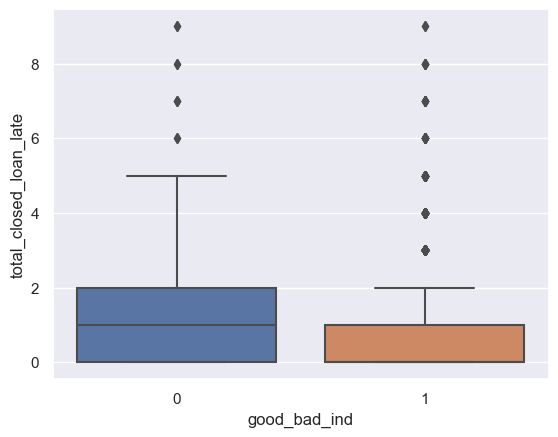

In [28]:
sns.boxplot(data = data, y='total_closed_loan_late', x ='good_bad_ind')

<Axes: xlabel='good_bad_ind', ylabel='loannumber'>

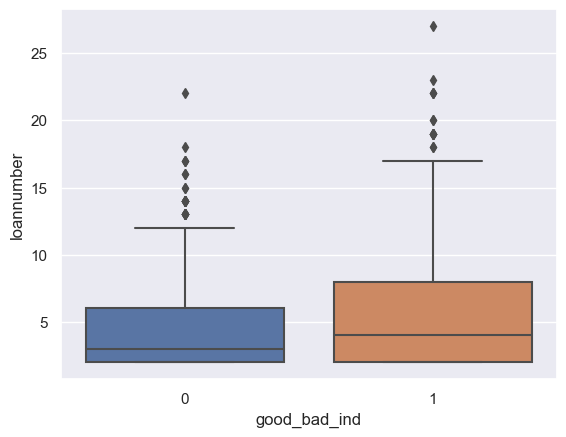

In [29]:
sns.boxplot(data = data, y='loannumber', x ='good_bad_ind')

<Axes: xlabel='good_bad_ind', ylabel='age'>

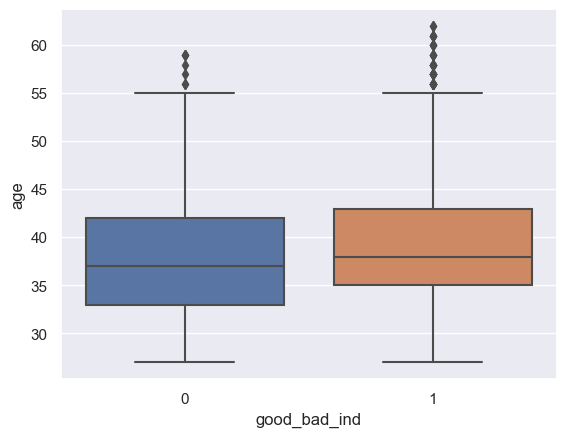

In [30]:
sns.boxplot(data = data, y='age', x ='good_bad_ind')

C:\Users\GIDEON HAMISI\AppData\Local\Temp\ipykernel_6840\3220365526.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(['employment_status_clients_Contract',


<Axes: xlabel='employment_status', ylabel='age'>

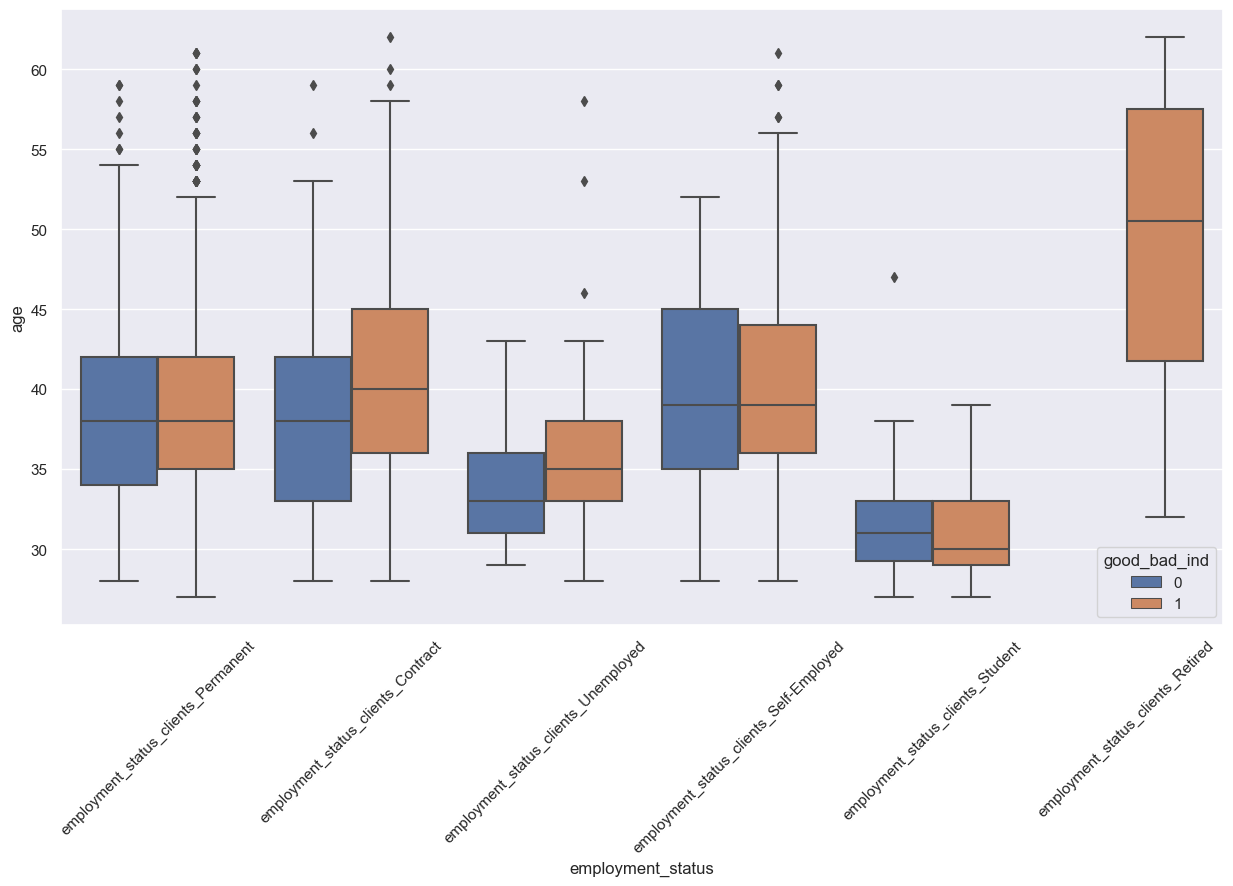

In [31]:
data["employment_status"] = data[['employment_status_clients_Contract',
            'employment_status_clients_Permanent',
            'employment_status_clients_Retired',
            'employment_status_clients_Self-Employed',
            'employment_status_clients_Student',
            'employment_status_clients_Unemployed']].idxmax(axis=1)



fig, axs = plt.subplots(1,1,figsize=(15,8))
axs.set_xticklabels(['employment_status_clients_Contract',
            'employment_status_clients_Permanent',
            'employment_status_clients_Retired',
            'employment_status_clients_Self-Employed',
            'employment_status_clients_Student',
            'employment_status_clients_Unemployed'], rotation=45)
sns.boxplot(data = data, y='age', x ='employment_status', hue = 'good_bad_ind')

[Text(0, 0, 'employment_status_clients_Contract'),
 Text(1, 0, 'employment_status_clients_Permanent'),
 Text(2, 0, 'employment_status_clients_Retired'),
 Text(3, 0, 'employment_status_clients_Self-Employed'),
 Text(4, 0, 'employment_status_clients_Student'),
 Text(5, 0, 'employment_status_clients_Unemployed')]

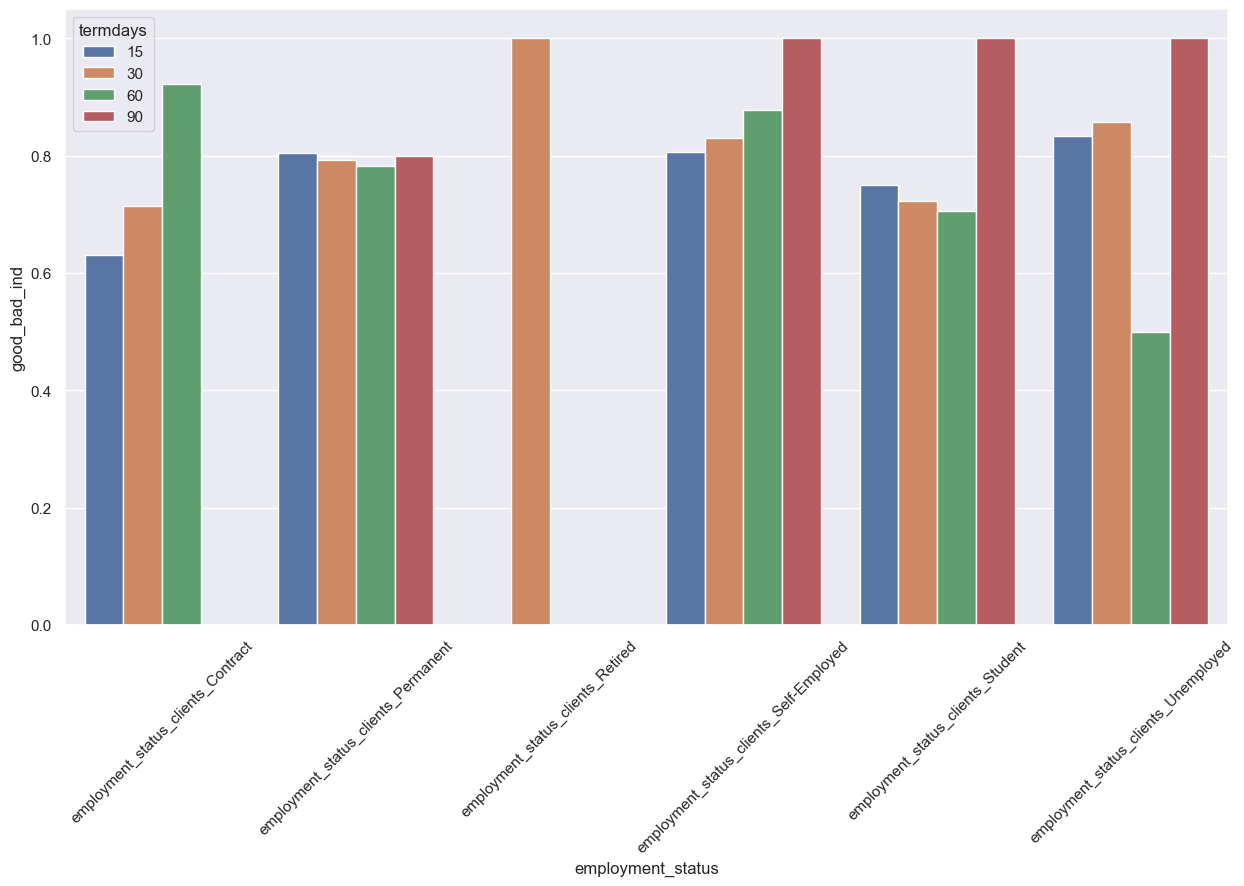

In [32]:
fig, axs = plt.subplots(1,1,figsize=(15,8))
gb = data[['termdays', 'employment_status', 'good_bad_ind']].groupby(['employment_status', 'termdays']).mean().reset_index()
sns.barplot(data = gb, x= 'employment_status', y = 'good_bad_ind',  hue = 'termdays')

axs.set_xticklabels(['employment_status_clients_Contract',
            'employment_status_clients_Permanent',
            'employment_status_clients_Retired',
            'employment_status_clients_Self-Employed',
            'employment_status_clients_Student',
            'employment_status_clients_Unemployed'], rotation=45)

<Axes: xlabel='termdays', ylabel='avg_loanamount'>

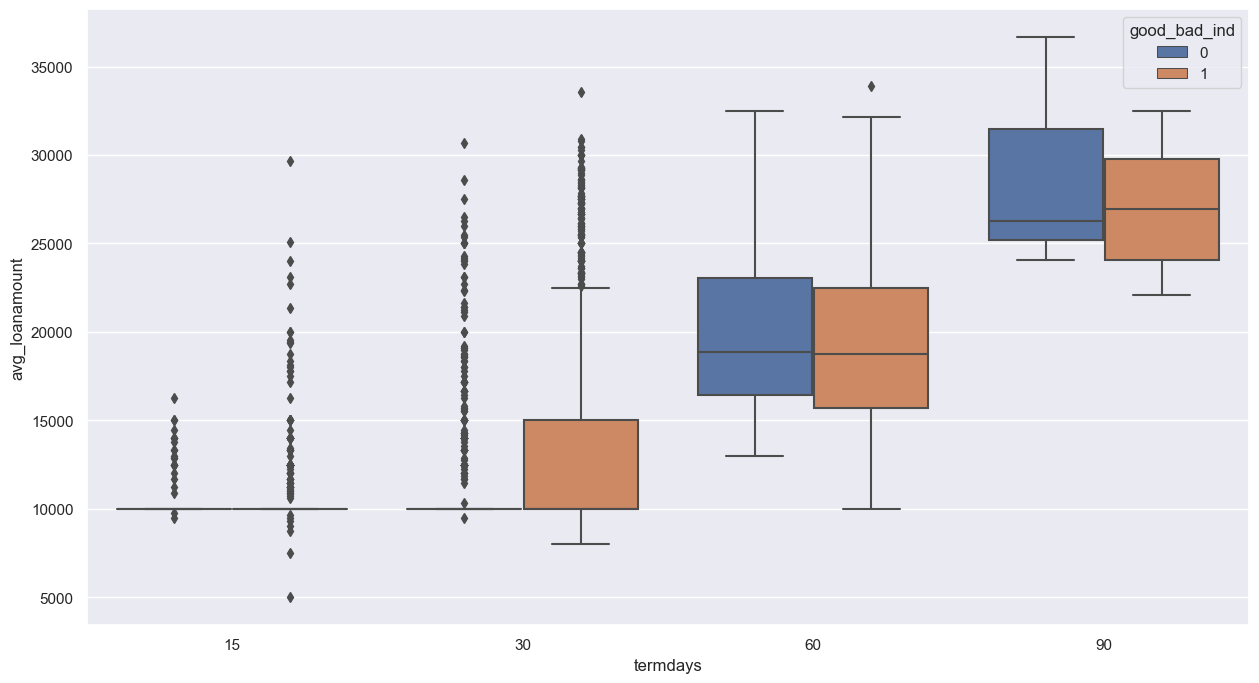

In [33]:
fig, axs = plt.subplots(1,1,figsize=(15,8))
sns.boxplot(data = data, y='avg_loanamount', x ='termdays', hue = 'good_bad_ind')

In [34]:
data[["termdays", 'good_bad_ind']].groupby(['termdays']).mean()

,good_bad_ind
termdays,
15,0.767883
30,0.783980
60,0.803653
90,0.857143


- Short term loans are more likely to be defaulted

## Make the test dataset

In [35]:
test_demo_cols = demo_features(test_demo)
test_prevloan_cols_grp_cols = prevloan_features(test_prevloan)
test_perf_cols = perf_features(test_perf, False)

In [36]:
test = merge_sets(test_perf_cols, test_demo_cols, test_prevloan_cols_grp_cols)
test.columns

Index(['customerid', 'loannumber', 'loanamount', 'termdays', 'age',
       'bank_account_type_Current', 'bank_account_type_Other',
       'bank_account_type_Savings', 'employment_status_clients_Contract',
       'employment_status_clients_Permanent',
       'employment_status_clients_Retired',
       'employment_status_clients_Self-Employed',
       'employment_status_clients_Student',
       'employment_status_clients_Unemployed',
       'employment_status_clients_Unknown', 'avg_loanamount',
       'total_missed_first_due_date', 'total_closed_loan_late',
       'average_termdays'],
      dtype='object')

## Baseline

In [37]:
n = train_perf.shape[0]
random_guess = np.random.randint(2, size=n)

In the given code snippet, it seems that you're using numpy to generate a random binary array random_guess of size n. Here's a breakdown of the code:

n = train_perf.shape[0]: This line assigns the value of the number of rows in the train_perf array to the variable n. It assumes that train_perf is a NumPy array or a similar data structure.
random_guess = np.random.randint(2, size=n): This line generates a random binary array random_guess of size n using the np.random.randint() function from NumPy. The randint(2, size=n) generates random integers between 0 and 1 (exclusive) since the upper limit, 2, is exclusive. The resulting array will contain n random binary values.
In summary, the code snippet generates a random binary array random_guess of size n, where n is determined by the number of rows in the train_perf array.

In [38]:
sum(random_guess == train_perf['good_bad_ind'])/n

0.49244505494505497

The expression sum(random_guess == train_perf['good_bad_ind'])/n calculates the proportion of matching elements between the random_guess array and the good_bad_ind column of the train_perf dataset.

Let's break it down step by step:

random_guess == train_perf['good_bad_ind']: This comparison creates a boolean array of the same size as random_guess. Each element of the array is True if the corresponding element in random_guess is equal to the corresponding element in the good_bad_ind column of the train_perf dataset, and False otherwise.

sum(random_guess == train_perf['good_bad_ind']): The sum() function calculates the sum of the True values in the boolean array. Since True is equivalent to 1 and False is equivalent to 0, this sum represents the count of matching elements between the two arrays.

n: This is the total number of elements in the random_guess array.

Therefore, sum(random_guess == train_perf['good_bad_ind'])/n calculates the proportion of matching elements by dividing the count of matches by the total number of elements.

In other words, it computes the fraction of elements in random_guess that are the same as the corresponding elements in the good_bad_ind column of the train_perf dataset.






Performamce to beat to have more value than a random guess ~50%

## Modelling

In [39]:
features = train.drop(['customerid','good_bad_ind'] , axis=1)
y = train['good_bad_ind']
rf = RandomForestClassifier(n_estimators=100)
rf.fit(features, y)
y_pred = rf.predict(features)
accuracy_score(y, y_pred)

0.9428484107579462

Peformance when predicting on self ~ 94%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7648854961832061

In [41]:
ind = rf.feature_importances_.argsort()[::-1]
features = rf.feature_importances_[ind]
cols = train.columns[ind]
for i in range(len(X_test.columns)):
    print(cols[i], features[i])

termdays 0.3285244102918637
total_missed_first_due_date 0.11359639549930635
customerid 0.1114729831051883
employment_status_clients_Unknown 0.09928406989446743
avg_loanamount 0.08302174329207394
employment_status_clients_Unemployed 0.08276302334185397
loannumber 0.04495063945104343
loanamount 0.03821647896639712
bank_account_type_Savings 0.020086149438413213
employment_status_clients_Student 0.01971579220840078
bank_account_type_Current 0.015613817054975113
age 0.015217780751263229
employment_status_clients_Retired 0.010197397908353837
employment_status_clients_Permanent 0.009407471111065713
employment_status_clients_Self-Employed 0.005624685354150916
good_bad_ind 0.0021766644471721704
employment_status_clients_Contract 0.00011857130511204656
bank_account_type_Other 1.192657889864217e-05


## Test Output

In [42]:
test_pred = rf.predict(test.drop('customerid', axis =1))

In [43]:
test_output = test[['customerid']]
test_output['Good_Bad_flag'] = test_pred
test_output.rename({'customerid': 'customerID'}, inplace=True, axis =1)
test_output.to_csv('Sub_file.csv')

C:\Users\GIDEON HAMISI\AppData\Local\Temp\ipykernel_6840\577236270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_output['Good_Bad_flag'] = test_pred
C:\Users\GIDEON HAMISI\AppData\Local\Temp\ipykernel_6840\577236270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_output.rename({'customerid': 'customerID'}, inplace=True, axis =1)
